In [ ]:
# Airy problem solved using the rational transformation on the semi-infinite
# domain that is listed in Boyd, 2000
@time include("airy-rat.jl")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]


RMS of eigenvalue error is 1.4797410632971594e-13
627.753190

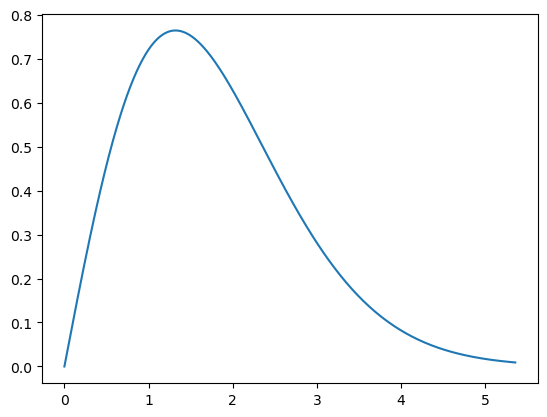

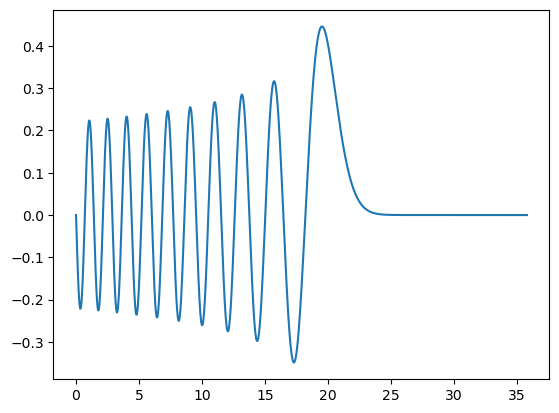

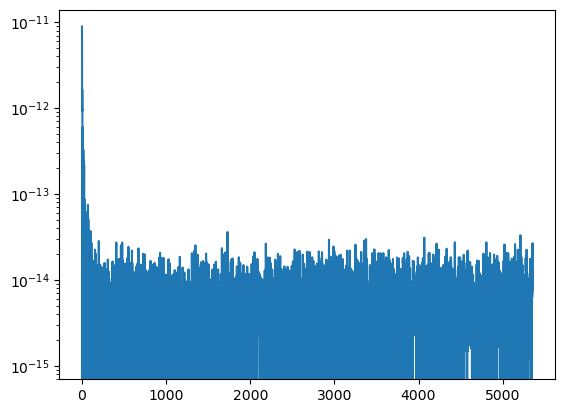

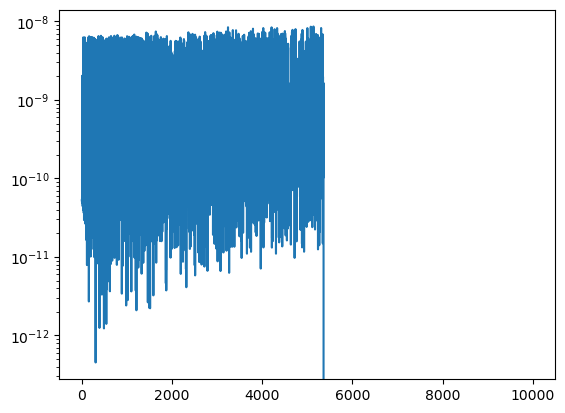

 seconds (45.79 M allocations: 20.823 GiB, 0.29% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd04f45aaf0>

In [1]:
@time include("airy-linear.jl")

In [4]:
err[:,1] = abs.(Yexact[:,1]-Y[:,1])./findmax(Yexact[:,1])[1]

10001-element Array{Float64,1}:
 2.329729305427229e-16
 0.0
 1.2284664562651977e-14
 9.696138249807019e-14
 1.5746471887852184e-13
 3.216749168054975e-13
 4.0633808048230214e-13
 6.302690515077337e-13
 7.447325655935197e-13
 9.52308868825226e-13
 1.220160889146792e-12
 1.4497544178256871e-12
 1.6817408763498687e-12
 ⋮
 1.0460384407835843e-13
 1.2876256084027872e-13
 9.718328461318042e-14
 1.1881769076650529e-13
 1.0143233563181096e-13
 1.1766496125946075e-13
 8.841722353754949e-14
 1.1968895180975707e-13
 8.678618581416726e-14
 1.183257678796833e-13
 8.261299810942705e-14
 0.0

In [5]:
findmax(Yexact[:,1])[1]

0.7639024045820686

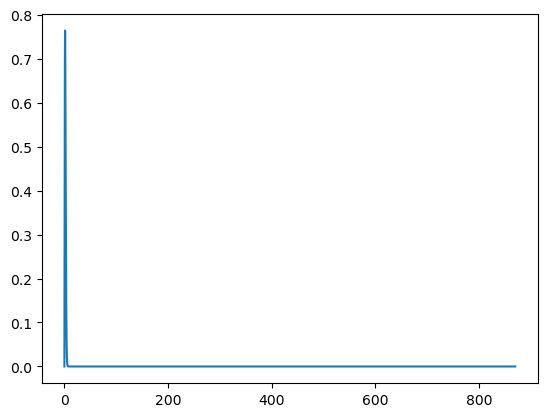

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd26eb0fe20>

In [6]:
plot(y,Yexact[:,1])